### 데이터 준비

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표시
# 데이터 불러오기
df = pd.read_csv('../data/dacon/train.csv')
df.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


### 타겟값 분석

#### 타겟값 히스토그램으로 분포 확인

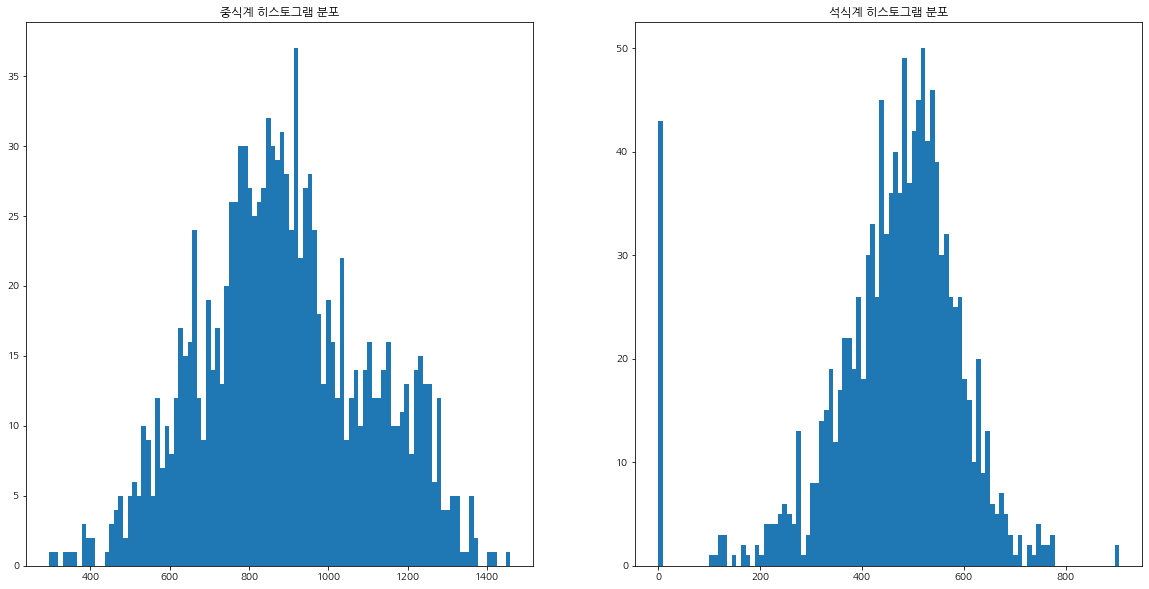

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.hist(df['중식계'], bins=100)
plt.title('중식계 히스토그램 분포')
plt.subplot(1,2,2)
plt.hist(df['석식계'], bins=100)
plt.title('석식계 히스토그램 분포')
plt.show()

- 석식계 0인 데이터들 << 확인 필요-
- 중식계, 석식계 모두 거의 정규분포 형태와 유사한 것을 확인할 수 있음

In [ ]:
# 석식계 데이터 확인
df['석식계'].describe()

count    1205.000000
mean      461.772614
std       139.179202
min         0.000000
25%       406.000000
50%       483.000000
75%       545.000000
max       905.000000
Name: 석식계, dtype: float64

In [ ]:
# 석식계 = 0인 데이터
dinner_zero = df[df['석식계']==0]
len(dinner_zero)

43

In [ ]:
dinner_zero.head(10)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,663.0,0.0


In [ ]:
# 석식메뉴 * 인 날
target_string = ['     *       ', '      *      ','    *        ']
dinner_star = df[df['석식메뉴'].map(lambda x: any(string in x for string in target_string))]
print(len(dinner_star))
dinner_star.head(3)

23


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0


In [ ]:
def get_not_star_idx():
    dinner_star_idx = dinner_star.index.tolist()
    
    dinner_zero_list = dinner_zero.index.tolist()
    
    not_star_list = [idx for idx in dinner_zero_list if idx not in dinner_star_idx]
    
    return not_star_list

In [ ]:
# 특정 행사 or 메뉴 있는데 석식계 = 0 인 데이터
dinner_not_star = df.iloc[get_not_star_idx()]
print(len(dinner_not_star))
dinner_not_star.head(3)

21


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0


두개 합치면 43개가 나와야하는데 44개가 나옴 -> ?? 

In [ ]:
df.iloc[586] # 없는데 석식계 존재하는 날 -> 오류데이터로 판단

일자                                                       2018-06-22
요일                                                                금
본사정원수                                                          2728
본사휴가자수                                                          178
본사출장자수                                                          305
본사시간외근무명령서승인건수                                                   50
현본사소속재택근무자수                                                       0
조식메뉴              모닝롤/애플파이  우유/주스 계란후라이 호박죽/쌀밥 (쌀:국내산) 열무된장국  숙주...
중식메뉴              쌀밥/잡곡밥 (쌀:국내산) 닭개장  코다리강정  잡채  도토리묵무침  포기김치 (김...
석식메뉴                                                        *      
중식계                                                             552
석식계                                                             448
Name: 586, dtype: object

In [ ]:
dinner_star.drop(586, axis=0, inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
len(dinner_star)

22

In [ ]:
dinner_not_star # 자기계발의 날 , 가정의 날, 빈칸, 석식메뉴 있는 날도 존재 
# * , 자기계발의 날, 가정의 날, 빈칸 -> 0 으로 통일 

In [ ]:
# 석식 메뉴 있는 날 제거 -> 502, 410
dinner_not_star.drop([502,410], inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
dinner_zero_df = pd.concat([dinner_star,dinner_not_star])
dinner_zero_idx = dinner_zero_df.index.tolist()

In [ ]:
df.loc[dinner_zero_idx,'석식메뉴'] = '0'

In [ ]:
df.iloc[dinner_zero_idx]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,0,1109.0,0.0
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,0,767.0,0.0
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,0,720.0,0.0
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,0,1065.0,0.0
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,0,953.0,0.0
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,0,835.0,0.0
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,0,663.0,0.0
412,2017-09-29,금,2642,214,248,22,0.0,모닝롤/치즈프레즐 우유/주스 계란후라이 홍게살죽/쌀밥 (쌀:국내산) 김치두부국 ...,쌀밥/잡곡밥 (쌀:국내산) 미역국 쇠불고기/잡채 오징어숙회무침 미니케익/식혜 ...,0,760.0,0.0
424,2017-10-25,수,2645,75,289,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 동태탕 시래기조...,곤드레밥*강된장 (쌀:국내산) 가쯔오장국 갈치조림 쇠고기잡채 쑥갓두부무침 알...,0,786.0,0.0
449,2017-11-29,수,2644,78,261,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 차돌박이찌개 시금...,나물비빔밥 (쌀:국내산) 미소장국 코다리조림 과일샐러드 군고구마 깍두기 (김...,0,903.0,0.0


In [ ]:
len(df.iloc[dinner_zero_idx])

41

In [ ]:
df.drop(586,inplace=True) # 위에서 오류데이터로 판단한 데이터 제거

### 메뉴 데이터 전처리

In [ ]:
# 테스트 데이터도 함께 처리
test = pd.read_csv('../data/dacon/test.csv')
test.shape

(50, 10)

In [ ]:
data = pd.concat([df,test])
data.shape

(1255, 12)

In [ ]:
data.reset_index(inplace=True,drop=True)

In [ ]:
data

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1250,2021-04-05,월,2973,125,174,704,331.0,모닝롤/커피콩빵 우유/주스 계란후라이 누룽지탕/흑미밥 청양콩나물국 스팸구이 양상추샐...,쌀밥/흑미밥/찰현미밥 쇠고기미역국 춘천닭갈비 오지치즈후라이 가지두반장볶음 포기김치 ...,흑미밥 돈육고추장찌개 갈치구이 김치전 취나물무침 깍두기,NaN,NaN
1251,2021-04-06,화,2973,76,170,636,364.0,모닝롤/모닝샌드 우유/주스 계란후라이 고구마스프/흑미밥 아욱국 참치채소볶음 양상추샐...,쌀밥/귀리밥/찰현미밥 순두부백탕 매콤소갈비찜 깻잎완자전 돌나물초장무침 포기김치 시리...,추가밥 짬뽕*생면 수제찹쌀꿔바로우 메추리알곤약장조림 단무지무침 포기김치,NaN,NaN
1252,2021-04-07,수,2973,96,214,1,334.0,모닝롤/호떡맥모닝 우유/주스 계란후라이 팥죽/흑미밥 닭살해장국 우엉채조림 양상추샐러...,쌀밥/흑미밥/찰현미밥 냉이국 돈육간장불고기 비빔냉면 오이나물볶음 겉절이김치 양상추샐...,단호박카레라이스 시금치된장국 소떡소떡 파프리카해초무침 감귤쥬스 포기김치,NaN,NaN
1253,2021-04-08,목,2973,105,238,509,324.0,모닝롤/크로크무슈 우유/주스 계란후라이 누룽지탕/흑미밥 감자국 두부양념조림 양상추샐...,쌀밥/옥수수밥/찰현미밥 맑은떡국 (New)로제찜닭 가자미구이*장 유채나물무침 포기김...,흑미밥 어묵매운탕 쇠고기숙주볶음 채소계란찜 쑥갓생무침 김치볶음,NaN,NaN


#### 메뉴 데이터 살펴보기

In [ ]:
# 메뉴 데이터 생략없이 출력되도록 설정
pd.set_option('display.max_colwidth', -1)

NameError: ignored

In [ ]:
menu_features = ['조식메뉴','중식메뉴','석식메뉴']
menu_df = data[menu_features]
menu_df.head()

- 제거해야할 부분들 -> 중/석식계에 영향 주지 않을 것 같은 옵션들
    - 원산지 표시
    - '/'  -> 쌀밥/잡곡밥에만 있어도 없애야하나 ..??
    - '*'
    
 - 포기김치 -> 모든 데이터에 포함되는지 ? 그렇다면 제거
 
 
 
 - 처리 후 예시 : 쌀밥 잡곡밥 오징어찌개 쇠불고기 계란찜 청포묵무침 요구르트

#### 테스트

In [ ]:
str(menu_df.iloc[1]['중식메뉴'])

'쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무침  요구르트  배추겉절이 (배추,고추가루:국내산) '

In [ ]:
import re

pattern = r'\([^)]*\)'
x = str(menu_df.iloc[1]['중식메뉴'])

text = re.sub(pattern=pattern, repl='', string= x)
text.split()

['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이']

In [ ]:
menu_df.shape # 각각 1254개씩 존재 

(1255, 3)

In [ ]:
# 처리하기 편하도록 하나의 열로 합치기 (0~1253 : 조식메뉴, 1254~2507 : 중식메뉴, 2508~ : 석식메뉴)
break_df = menu_df['조식메뉴']
lunch_df = menu_df['중식메뉴']
dinner_df = menu_df['석식메뉴']
menu_list = pd.concat([break_df,lunch_df,dinner_df],axis=0)
menu_list.shape

(3765,)

In [ ]:
menu_list

0       모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐어채무침  포기김치 (배추,고추가루:국내산)      
1       모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌개  시래기조림  포기김치 (배추,고추가루:국내산)  
2       모닝롤/베이글  우유/두유/주스 계란후라이  표고버섯죽/쌀밥 (쌀:국내산) 콩나물국  느타리호박볶음  포기김치 (배추,고추가루:국내산) 
3       모닝롤/토마토샌드  우유/두유/주스 계란후라이  닭죽/쌀밥 (쌀,닭:국내산) 근대국  멸치볶음  포기김치 (배추,고추가루:국내산)    
4       모닝롤/와플  우유/두유/주스 계란후라이  쇠고기죽/쌀밥 (쌀:국내산) 재첩국  방풍나물  포기김치 (배추,고추가루:국내산)       
                                         ...                                        
1250    흑미밥 돈육고추장찌개 갈치구이 김치전 취나물무침 깍두기                                              
1251    추가밥 짬뽕*생면 수제찹쌀꿔바로우 메추리알곤약장조림 단무지무침 포기김치                                     
1252    단호박카레라이스 시금치된장국 소떡소떡 파프리카해초무침 감귤쥬스 포기김치                                     
1253    흑미밥 어묵매운탕 쇠고기숙주볶음 채소계란찜 쑥갓생무침 김치볶음                                          
1254    흑미밥 맑은버섯국 매운사태조림 춘권*타르타르D 열무나물무침 포기김치                                       
Length: 3765, dtype: object

In [ ]:
# 원산지 내용 제거하는 함수 작성
def remove_origin():
    remove_list = []
    for x in menu_list:
        pattern = r'\([^)]*\)'
        x = str(x)
        text = re.sub(pattern=pattern, repl='', string= x)
        remove_list.append(text.split()) # 처리한 데이터 저장
    return remove_list

In [ ]:
remove_list = remove_origin()
remove_list[:11]

[['모닝롤/찐빵', '우유/두유/주스', '계란후라이', '호두죽/쌀밥', '된장찌개', '쥐어채무침', '포기김치'],
 ['모닝롤/단호박샌드', '우유/두유/주스', '계란후라이', '팥죽/쌀밥', '호박젓국찌개', '시래기조림', '포기김치'],
 ['모닝롤/베이글', '우유/두유/주스', '계란후라이', '표고버섯죽/쌀밥', '콩나물국', '느타리호박볶음', '포기김치'],
 ['모닝롤/토마토샌드', '우유/두유/주스', '계란후라이', '닭죽/쌀밥', '근대국', '멸치볶음', '포기김치'],
 ['모닝롤/와플', '우유/두유/주스', '계란후라이', '쇠고기죽/쌀밥', '재첩국', '방풍나물', '포기김치'],
 ['팬케익/찐빵', '우유/두유/주스', '계란후라이', '견과류죽/쌀밥', '감자찌개', '명엽채무침', '포기김치'],
 ['모닝롤/야채샌드', '우유/두유/주스', '계란후라이', '고구마죽/쌀밥', '봄동된장국', '숙주나물', '포기김치'],
 ['모닝롤/치즈프레즐', '우유/두유/주스', '계란후라이', '잣죽/쌀밥', '민물새우찌개', '콩조림', '포기김치'],
 ['모닝롤/마늘빵', '우유/두유/주스', '계란후라이', '단호박죽/쌀밥', '어묵국', '김구이', '포기김치'],
 ['모닝롤/참치샌드', '우유/두유/주스', '계란후라이', '흑임자죽/쌀밥', '북어계란국', '무생채', '포기김치'],
 ['모닝롤/인절미토스트', '우유/두유/주스', '계란후라이', '계란후라이', '선지해장국', '톳두부무침', '포기김치']]

In [ ]:
# 다시 조식/중식/석식으로 나누기
remove_break = pd.DataFrame(remove_list[:1254])
remove_lunch = pd.DataFrame(remove_list[1254:2508])
remove_dinner = pd.DataFrame(remove_list[2508:])
print(remove_break.shape,remove_lunch.shape, remove_dinner.shape)

(1254, 9) (1254, 8) (1257, 8)


In [ ]:
remove_break

,0,1,2,3,4,5,6,7,8
0,모닝롤/찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,포기김치,None,None
1,모닝롤/단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,포기김치,None,None
2,모닝롤/베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,포기김치,None,None
3,모닝롤/토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,포기김치,None,None
4,모닝롤/와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,포기김치,None,None
...,...,...,...,...,...,...,...,...,...
1249,모닝롤/야채샌드위치,우유/주스,계란후라이,바지락죽/흑미밥,김칫국,비엔나구이*케찹,양상추샐러드,포기김치,None
1250,모닝롤/커피콩빵,우유/주스,계란후라이,누룽지탕/흑미밥,청양콩나물국,스팸구이,양상추샐러드,포기김치,None
1251,모닝롤/모닝샌드,우유/주스,계란후라이,고구마스프/흑미밥,아욱국,참치채소볶음,양상추샐러드,포기김치,None
1252,모닝롤/호떡맥모닝,우유/주스,계란후라이,팥죽/흑미밥,닭살해장국,우엉채조림,양상추샐러드/바나나,포기김치,None


In [ ]:
remove_break.iloc[:,0]

0       모닝롤/찐빵    
1       모닝롤/단호박샌드 
2       모닝롤/베이글   
3       모닝롤/토마토샌드 
4       모닝롤/와플    
         ...      
1249    모닝롤/야채샌드위치
1250    모닝롤/커피콩빵  
1251    모닝롤/모닝샌드  
1252    모닝롤/호떡맥모닝 
1253    모닝롤/크로크무슈 
Name: 0, Length: 1254, dtype: object

- 모닝롤/ <- 제거 
- 계란후라이
- 죽/밥 나누기 ?

In [ ]:
remove_break.loc[:,2].value_counts()

계란후라이         941
스크램블에그        241
계란후라이/찐계란     33 
구운계란          18 
삶은계란          13 
우유/주스         4  
계란후라이/구운계란    2  
스크램블          1  
시금치프리타타       1  
Name: 2, dtype: int64

In [ ]:
remove_break.iloc[1034] # 얘는 왜 나눠졌지 .. ?? 

0    모닝롤/      
1    남친샌드위치    
2    우유/주스     
3    계란후라이/삶은계란
4    누룽지탕/쌀밥   
5    사과베이비샐러드  
6    참치김치찌개    
7    쑥갓두부무침    
8    포기김치      
Name: 1034, dtype: object

In [ ]:
remove_break.iloc[1035]

0    모닝롤/샌드위치
1    컵케익     
2    우유/주스   
3    계란후라이   
4    흑임자죽/쌀밥 
5    샐러드*땅콩소스
6    건새우아욱국  
7    매운감자조림  
8    포기김치    
Name: 1035, dtype: object

In [ ]:
remove_break.iloc[383]

0    모닝롤/와플  
1    옥수수스프/사과
2    우유/주스   
3    키위드레싱샐러드
4    버섯죽/쌀밥  
5    북어해장국   
6    시금치프리타타 
7    포기김치    
8    None    
Name: 383, dtype: object

In [ ]:
remove_break.iloc[351] # 얘는 또 순서가 다름.. 

0    모닝롤/와플 
1    우유/주스  
2    시금치프리타타
3    누룽지탕/쌀밥
4    오징어국   
5    호박볶음   
6    포기김치   
7    None   
8    None   
Name: 351, dtype: object

In [ ]:
remove_lunch # 밥 / 찌개 / 반찬1 / 반찬2 / 반찬3 / 반찬4 / 디저트 / 김치 순으로 분류하면 좋을듯 (없는것들은 None으로 처리)

,0,1,2,3,4,5,6,7
0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,요구르트,포기김치,None
1,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,요구르트,배추겉절이,None
2,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,요구르트,포기김치,None
3,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,요구르트,포기김치,None
4,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,요구르트,포기김치,None
...,...,...,...,...,...,...,...,...
1249,쌀밥/흑미밥/찰현미밥,쇠고기미역국,춘천닭갈비,오지치즈후라이,가지두반장볶음,포기김치,양상추샐러드*오미자D,None
1250,쌀밥/귀리밥/찰현미밥,순두부백탕,매콤소갈비찜,깻잎완자전,돌나물초장무침,포기김치,시리얼샐러드*요거트D,None
1251,쌀밥/흑미밥/찰현미밥,냉이국,돈육간장불고기,비빔냉면,오이나물볶음,겉절이김치,양상추샐러드*시저D,None
1252,쌀밥/옥수수밥/찰현미밥,맑은떡국,로제찜닭,가자미구이*장,유채나물무침,포기김치,양상추샐러드*자몽D,None


In [ ]:
remove_lunch.loc[:,7].value_counts()

고추가루:중국산)      2
깍두기            1
양상추샐러드*키위D     1
배추겉절이          1
열무김치           1
포기김치           1
알타리김치          1
견과류샐러드*요거트D    1
Name: 7, dtype: int64

In [ ]:
remove_lunch.loc[:,7].sort_values()

1141    견과류샐러드*요거트D
1038    고추가루:중국산)  
1040    고추가루:중국산)  
1030    깍두기        
1031    배추겉절이      
        ...        
1249    None       
1250    None       
1251    None       
1252    None       
1253    None       
Name: 7, Length: 1254, dtype: object

In [ ]:
remove_dinner.loc[1038,7] = None
remove_dinner.loc[1040,7] = None
remove_dinner.loc[:,6].value_counts() # 다시 확인

포기김치     13
깍두기      2 
배추김치     1 
알타리김치    1 
단무지      1 
석박지      1 
Name: 6, dtype: int64

- 제거해야할 지 ? 
    - 밥 종류 -> 하나로 통일? 밥 종류가 중/석섹 먹을지 말지에 영향을 주는지
    - 메뉴들중에 * 붙은 거 -> 면종류/양념종류 정보 
    - 김치류.. 

In [ ]:
remove_dinner
# 밥 / 찌개 / 반찬1 / 반찬2 / 반찬3 / 반찬4 / 디저트 / 김치 순으로 분류하면 좋을듯 -> 이후 인코딩 

,0,1,2,3,4,5,6,7
0,쌀밥/잡곡밥,육개장,자반고등어구이,두부조림,건파래무침,포기김치,None,None
1,콩나물밥*양념장,어묵국,유산슬,아삭고추무침,바나나,포기김치,None,None
2,쌀밥/잡곡밥,청국장찌개,황태양념구이,고기전,새송이버섯볶음,포기김치,None,None
3,미니김밥*겨자장,우동,멕시칸샐러드,군고구마,무피클,포기김치,None,None
4,쌀밥/잡곡밥,차돌박이찌개,닭갈비,감자소세지볶음,콩나물무침,포기김치,None,None
...,...,...,...,...,...,...,...,...
1249,흑미밥,돈육고추장찌개,갈치구이,김치전,취나물무침,깍두기,None,None
1250,추가밥,짬뽕*생면,수제찹쌀꿔바로우,메추리알곤약장조림,단무지무침,포기김치,None,None
1251,단호박카레라이스,시금치된장국,소떡소떡,파프리카해초무침,감귤쥬스,포기김치,None,None
1252,흑미밥,어묵매운탕,쇠고기숙주볶음,채소계란찜,쑥갓생무침,김치볶음,None,None


In [ ]:
remove_dinner.loc[:,6].value_counts() # 원산지 제거 안된 데이터 ? ? -> 제거

포기김치         13
깍두기          2 
고추가루:중국산)    2 
배추김치         1 
알타리김치        1 
단무지          1 
석박지          1 
Name: 6, dtype: int64

In [ ]:
df.iloc[1039] # 데이터 내 괄호 없음 (입력시 오류인듯) 

일자                2020-05-07                                                                        
요일                목                                                                                 
본사정원수             2962                                                                              
본사휴가자수            76                                                                                
본사출장자수            236                                                                               
본사시간외근무명령서승인건수    577                                                                               
현본사소속재택근무자수       285                                                                               
조식메뉴              모닝롤/치즈프레즐  우유/주스 계란후라이/구운계란 누룽지탕/쌀밥 과일샐러드 홍합살미역국  미나리숙주무침  포기김치 (배추,고추가루:국내산)     
중식메뉴              쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 냉메밀소바  히레카츠*소스  견과류연근조림  양배추채무침 과일,프로바이오틱 포기김치 (배추,고추가루:국내산) 
석식메뉴              쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 우삼겹부대찌개  조기구이  수제어묵볶음  섬초무침  배추겉절이 고추가루:중국산)        

In [ ]:
df.iloc[1044] # 위와 동일

일자                2020-05-14                                                                                   
요일                목                                                                                            
본사정원수             2962                                                                                         
본사휴가자수            71                                                                                           
본사출장자수            281                                                                                          
본사시간외근무명령서승인건수    488                                                                                          
현본사소속재택근무자수       212                                                                                          
조식메뉴              모닝롤/프렌치토스트  우유/주스 계란후라이/구운계란 누룽지탕/쌀밥 양상추샐러드*오리엔탈D 맑은조개탕  시금치두부무침  포기김치 (배추,고추가루:국내산)         
중식메뉴              소고기콩나물밥*양념 (쌀,현미,흑미:국내산) 들깨미역국  바싹불고기*양파초절임  야채스틱*견과쌈장  고추장누들떡볶이 파인애플,요플레 포기김치 (배추,고추가

In [ ]:
remove_dinner.loc[1044,6] = None
remove_dinner.loc[1039,6] = None
remove_dinner.loc[:,6].value_counts() # 다시 확인

포기김치     13
깍두기      2 
배추김치     1 
알타리김치    1 
단무지      1 
석박지      1 
Name: 6, dtype: int64

In [ ]:
remove_dinner.loc[:,7].value_counts()

포기김치    1
Name: 7, dtype: int64

#### 원본 데이터에 추가

In [ ]:
data.drop(['조식메뉴','중식메뉴','석식메뉴'], axis=1, inplace =True) # 원래 메뉴 데이터 제거

열 이름 설정 필요

In [ ]:
tt = pd.concat([data,remove_break,remove_lunch,remove_dinner],axis=1)
tt 

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,0,...,6,7,0,1,2,3,4,5,6,7
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,모닝롤/찐빵,...,포기김치,None,쌀밥/잡곡밥,육개장,자반고등어구이,두부조림,건파래무침,포기김치,None,None
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,모닝롤/단호박샌드,...,배추겉절이,None,콩나물밥*양념장,어묵국,유산슬,아삭고추무침,바나나,포기김치,None,None
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,모닝롤/베이글,...,포기김치,None,쌀밥/잡곡밥,청국장찌개,황태양념구이,고기전,새송이버섯볶음,포기김치,None,None
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,모닝롤/토마토샌드,...,포기김치,None,미니김밥*겨자장,우동,멕시칸샐러드,군고구마,무피클,포기김치,None,None
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,모닝롤/와플,...,포기김치,None,쌀밥/잡곡밥,차돌박이찌개,닭갈비,감자소세지볶음,콩나물무침,포기김치,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,2021-04-05,월,2973,125,174,704,331.0,NaN,NaN,모닝롤/커피콩빵,...,양상추샐러드*오미자D,None,흑미밥,돈육고추장찌개,갈치구이,김치전,취나물무침,깍두기,None,None
1250,2021-04-06,화,2973,76,170,636,364.0,NaN,NaN,모닝롤/모닝샌드,...,시리얼샐러드*요거트D,None,추가밥,짬뽕*생면,수제찹쌀꿔바로우,메추리알곤약장조림,단무지무침,포기김치,None,None
1251,2021-04-07,수,2973,96,214,1,334.0,NaN,NaN,모닝롤/호떡맥모닝,...,양상추샐러드*시저D,None,단호박카레라이스,시금치된장국,소떡소떡,파프리카해초무침,감귤쥬스,포기김치,None,None
1252,2021-04-08,목,2973,105,238,509,324.0,NaN,NaN,모닝롤/크로크무슈,...,양상추샐러드*자몽D,None,흑미밥,어묵매운탕,쇠고기숙주볶음,채소계란찜,쑥갓생무침,김치볶음,None,None


#### 메뉴 데이터 클렌징
1. 조/중/석식 3개로 나눠서 각자 해보기 -> 통합 어려울 수 있음
2. 처리해야할 리스트 작성 후 각자 해서 코드 합치기 -> 리스트 작성 필요 .. 
    - 직접 처리하고 모델 돌려보기 + 성능 확인 후 데이콘에서 비교 해보기
    - 성능 향상 최대한 해보고 안되면 다른 코드들 참고해서 수정하기